In [1]:
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
%matplotlib inline
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)

## 日期和时间数据类型及工具
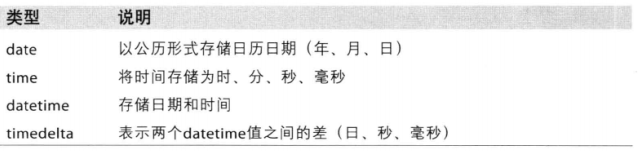

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 8, 28, 9, 3, 23, 407671)

In [3]:
now.year,now.month,now.day

(2017, 8, 28)

In [4]:
# datetime.timedelta表示两个datetime之间的时间差
delta = datetime(2017,8,25)-datetime(1994,9,6,8,15)
delta

datetime.timedelta(8388, 56700)

In [5]:
delta.days,delta.seconds

(8388, 56700)

In [6]:
# 可以给datetime对象加减一个或多个timedelta，产生一个新对象
from datetime import timedelta
start = datetime(2016,8,1)
start+timedelta(12)

datetime.datetime(2016, 8, 13, 0, 0)

In [7]:
start-2*timedelta(12)

datetime.datetime(2016, 7, 8, 0, 0)

## 字符串和datetime的相互转换

In [8]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
# 格式化输出
stamp.strftime('%Y-%m-%d')

'2011-01-03'

全部的格式化：  
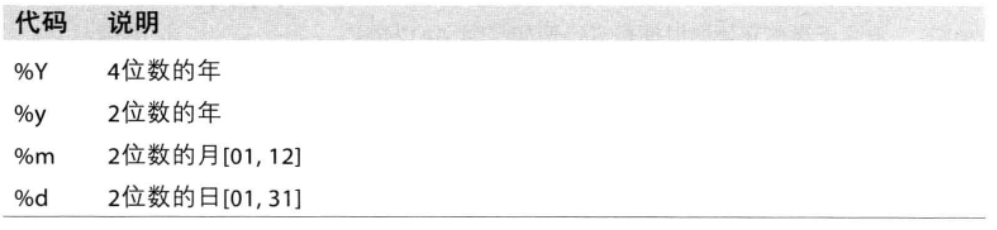

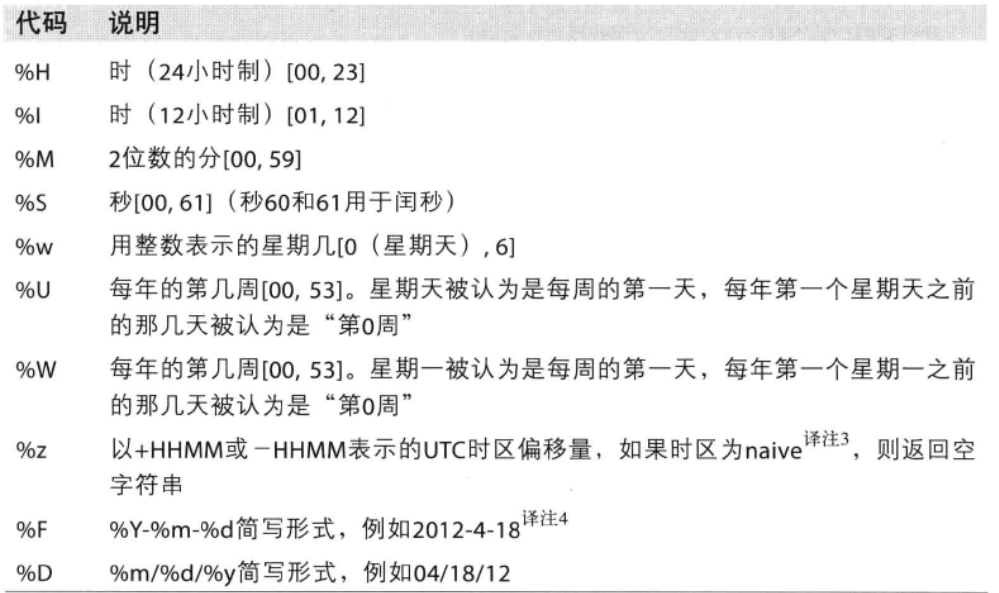

In [11]:
# datetime.strptime也可以将字符串转换为日期。
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ['7/6/2001','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2001, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [14]:
# dateutil包可以做类似操作
# from dateutil import parse
# parse('2011-01-03')
# parse('Jan 31,1997, 10:45 PM')
# parse('6/12/2009',dayfirst = True)

pandas可以处理成组日期，不管这些日期是DataFrame的轴索引还是列。

In [15]:
datestrs

['7/6/2001', '8/6/2011']

In [16]:
pd.to_datetime(datestrs)

DatetimeIndex(['2001-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

# 时间序列基础

pandas最基本的时间序列类型就是以时间戳为索引的Series列

In [17]:
from datetime import datetime

In [18]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

In [21]:
ts = Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.480773
2011-01-05   -1.172521
2011-01-07   -0.297040
2011-01-08   -1.462142
2011-01-10   -0.810052
2011-01-12    0.171896
dtype: float64

In [22]:
type(ts)

pandas.core.series.Series

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [25]:
# 不同索引的时间序列之间的算术运算会按照日期自动对齐
ts+ts[::2]

2011-01-02   -0.961546
2011-01-05         NaN
2011-01-07   -0.594080
2011-01-08         NaN
2011-01-10   -1.620104
2011-01-12         NaN
dtype: float64

In [26]:
ts[ts.index[2]]

-0.29704005373209075

In [27]:
# 时间序列可传入一个被解释成日期的字符串
ts['1/10/2011']

-0.81005178570043357

In [28]:
ts['20110110']

-0.81005178570043357

In [30]:
# 生成较长的时间序列
longer_ts = Series(np.random.randn(1000),index = pd.date_range('1/1/2011',periods=1000))
longer_ts

2011-01-01   -0.287268
2011-01-02   -0.085356
2011-01-03    0.129015
2011-01-04    0.020235
2011-01-05    0.023342
2011-01-06   -1.350829
                ...   
2013-09-21    0.085355
2013-09-22    0.233476
2013-09-23    0.649861
2013-09-24   -0.073039
2013-09-25   -1.451880
2013-09-26   -0.884362
Freq: D, dtype: float64

In [32]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED') # start=2000 1 05,每星期为一个周期，生成100组数列
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [35]:
long_df = DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','NewYork','Ohio'])
long_df

,Colorado,Texas,NewYork,Ohio
2000-01-05,0.195786,1.466828,0.529279,-1.696507
2000-01-12,0.888808,-0.012289,-0.125990,-0.619118
2000-01-19,0.104230,0.987077,-0.450151,1.208394
2000-01-26,0.040776,-0.126404,0.122634,0.686784
2000-02-02,0.526146,-0.591494,-1.479638,-0.000326
2000-02-09,1.029996,-0.907858,0.301625,-0.306564
...,...,...,...,...
2001-10-24,1.161812,0.481376,0.615076,1.021524
2001-10-31,-0.284907,0.409955,0.275466,-1.081303
2001-11-07,-0.399792,-0.750243,-0.536920,0.754345


In [36]:
long_df.ix['5-2001']

,Colorado,Texas,NewYork,Ohio
2001-05-02,0.630780,1.447798,-0.725529,0.559155
2001-05-09,-2.453561,0.015003,-0.248578,0.135511
2001-05-16,-1.613971,-0.407667,-0.945537,-0.630434
2001-05-23,0.940445,0.258925,0.235480,0.227330
2001-05-30,0.362518,0.534932,-0.409503,-0.218754


# 日期的范围、频率以及移动

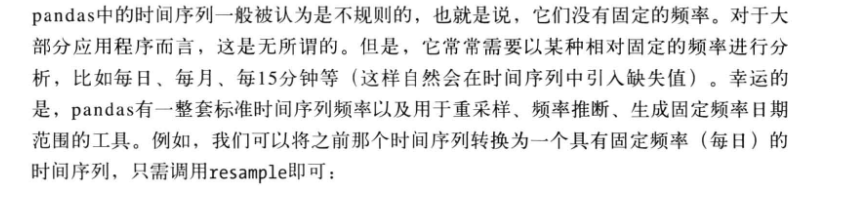

In [37]:
ts

2011-01-02   -0.480773
2011-01-05   -1.172521
2011-01-07   -0.297040
2011-01-08   -1.462142
2011-01-10   -0.810052
2011-01-12    0.171896
dtype: float64

In [45]:
ts.resample('D').asfreq()

2011-01-02   -0.480773
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -1.172521
2011-01-06         NaN
2011-01-07   -0.297040
2011-01-08   -1.462142
2011-01-09         NaN
2011-01-10   -0.810052
2011-01-11         NaN
2011-01-12    0.171896
Freq: D, dtype: float64

In [44]:
# 前项填充缺失值
ts.resample('D').pad()

2011-01-02   -0.480773
2011-01-03   -0.480773
2011-01-04   -0.480773
2011-01-05   -1.172521
2011-01-06   -1.172521
2011-01-07   -0.297040
2011-01-08   -1.462142
2011-01-09   -1.462142
2011-01-10   -0.810052
2011-01-11   -0.810052
2011-01-12    0.171896
Freq: D, dtype: float64

In [46]:
# 后项填充缺失值
ts.resample('D').bfill()

2011-01-02   -0.480773
2011-01-03   -1.172521
2011-01-04   -1.172521
2011-01-05   -1.172521
2011-01-06   -0.297040
2011-01-07   -0.297040
2011-01-08   -1.462142
2011-01-09   -0.810052
2011-01-10   -0.810052
2011-01-11    0.171896
2011-01-12    0.171896
Freq: D, dtype: float64

## 生产日期范围

In [47]:
index = pd.date_range('4/1/2012','6/1/2012') # 默认以一天为单位
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [48]:
pd.date_range(start='4/1/2012',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range(end='6/1/2012',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('1-1-2000','12-1-2000',freq='BM')  # BM=business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
# 产生一组被规范化的时间戳
pd.date_range('5/2/2012 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移量
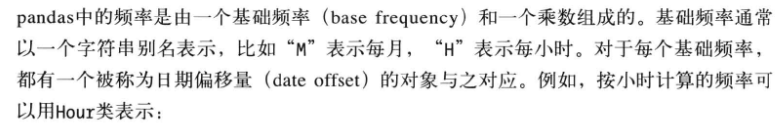

In [53]:
from pandas.tseries.offsets import Hour,Minute

In [54]:
hour = Hour()
hour

<Hour>

In [55]:
# 定义偏移量的倍数：
four_hours = Hour(4)
four_hours

<4 * Hours>

In [56]:
pd.date_range('1/1/2000','1/3/2000 23:59',freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [57]:
# 偏移量可以通过加法进行连接：
Hour(2)+Minute(30)

<150 * Minutes>

In [58]:
pd.date_range('1/1/2000',periods=10,freq='1h39min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:39:00',
               '2000-01-01 03:18:00', '2000-01-01 04:57:00',
               '2000-01-01 06:36:00', '2000-01-01 08:15:00',
               '2000-01-01 09:54:00', '2000-01-01 11:33:00',
               '2000-01-01 13:12:00', '2000-01-01 14:51:00'],
              dtype='datetime64[ns]', freq='99T')

下图列出了pandas中的基础频率和日期偏移量类
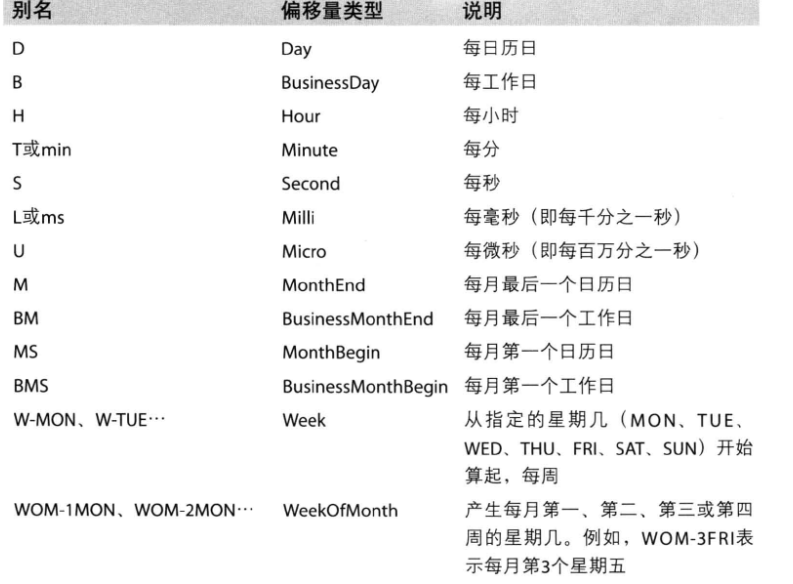

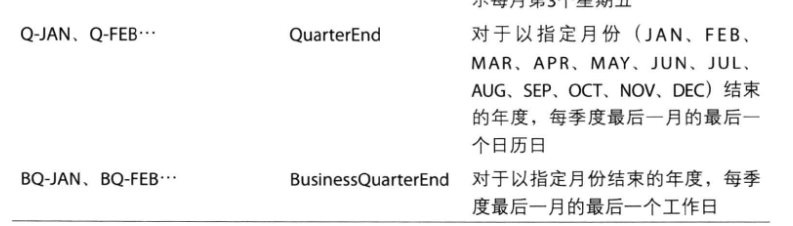

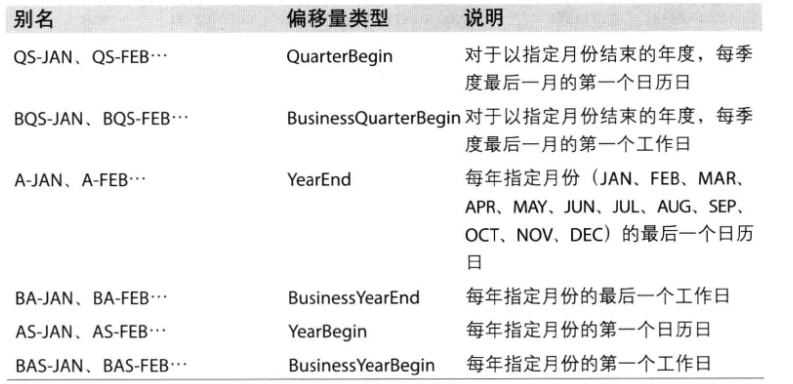

In [72]:
# 获得每月第三个星期五之类的日期
rng = pd.date_range('1/1/2012','9/1/2012',freq='WOM-3FRI')
rng.tolist()

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [73]:
rng.tolist()[0].strftime('%Y-%m-%d')

'2012-01-20'

## 移动（超前和滞后）数据

In [74]:
# pandas利用shift方法将数据沿着时间轴前移或后移
ts = Series(np.random.randn(4),index = pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31    1.508916
2000-02-29   -0.867847
2000-03-31    0.678442
2000-04-30   -0.940331
Freq: M, dtype: float64

In [80]:
ts.shift(2)  # 前移2M

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.508916
2000-04-30   -0.867847
Freq: M, dtype: float64

In [81]:
ts.shift(-2)  # 后移2M

2000-01-31    0.678442
2000-02-29   -0.940331
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [82]:
# 如果频率已知，则可以对时间戳进行位移
ts.shift(2,freq='M') 

2000-03-31    1.508916
2000-04-30   -0.867847
2000-05-31    0.678442
2000-06-30   -0.940331
Freq: M, dtype: float64

In [83]:
ts.shift(3,freq='D')

2000-02-03    1.508916
2000-03-03   -0.867847
2000-04-03    0.678442
2000-05-03   -0.940331
dtype: float64

In [84]:
ts.shift(1,freq='3D')

2000-02-03    1.508916
2000-03-03   -0.867847
2000-04-03    0.678442
2000-05-03   -0.940331
dtype: float64

In [85]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00    1.508916
2000-02-29 01:30:00   -0.867847
2000-03-31 01:30:00    0.678442
2000-04-30 01:30:00   -0.940331
Freq: M, dtype: float64

## 通过偏移量对日期进行位移

In [88]:
from pandas.tseries.offsets import Day,MonthEnd

In [87]:
now = datetime(2011,11,17)
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [91]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [92]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [93]:
# rollforward与rollback
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [94]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [95]:
# 结合groupby使用滚动方法,统计每个月的平均值
ts = Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.163025
2000-02-29   -0.234625
2000-03-31   -0.231911
dtype: float64

In [97]:
# 更简单的方法：重采样
ts.resample('M').mean()

2000-01-31   -0.163025
2000-02-29   -0.234625
2000-03-31   -0.231911
Freq: M, dtype: float64

# 周期及其算术运算

周期（period）表示的是时间区间，比如数日、数月、数年等。Period类表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及频率。

In [100]:
# 生成2007年1月1日到2007年12月31日之间的整段日期
p = pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [101]:
p+5

Period('2012', 'A-DEC')

In [103]:
pd.Period('2014',freq='A-DEC')-p

7

In [105]:
# 创建规则的周期范围：
rng = pd.period_range('1/1/2000','6/30/2000',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [106]:
Series(np.random.randn(6),index=rng)

2000-01    0.134425
2000-02    0.317922
2000-03    0.319966
2000-04    0.771677
2000-05    0.240622
2000-06   -1.629029
Freq: M, dtype: float64

## 周期的频率转换

Period和PeriodIndex对象都可以通过其asfreq方法转换成别的频率。  
假设我们有一个年度周期，希望将其转换为当年年初或年末的一个月度周期。

In [108]:
p = pd.Period('2007',freq='A-DEC')

In [109]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [110]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [112]:
rng = pd.period_range('2006','2009',freq='A-DEC')
ts = Series(np.random.randn(len(rng)),index = rng)
ts

2006   -0.864034
2007   -1.104541
2008    0.657733
2009    0.307201
Freq: A-DEC, dtype: float64

In [113]:
ts.asfreq('M',how='start')

2006-01   -0.864034
2007-01   -1.104541
2008-01    0.657733
2009-01    0.307201
Freq: M, dtype: float64

## 按季度计算的周期频率

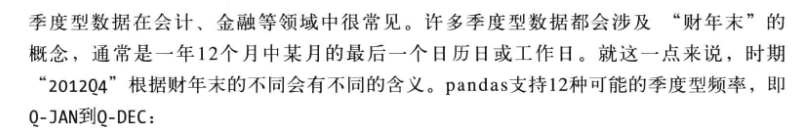

In [116]:
p = pd.Period('2012Q4',freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

在以1月结束的财年中，2012Q4是重11月到1月。  
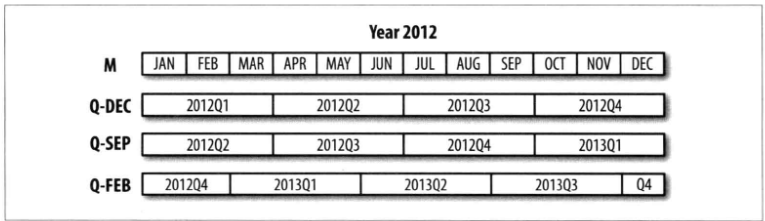

In [117]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [118]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [124]:
# 获取该季度倒数第二个工作日下午4点的时间戳

p4pm = (p.asfreq('B','e')-1).asfreq('T','s')+16*60  # e=end,s=start
p4pm

Period('2012-01-30 16:00', 'T')

In [122]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [125]:
# 季度性范围
rng = pd.period_range('2013Q3','2014Q4',freq='Q-JAN')
ts = Series(np.arange(len(rng)),index=rng)
ts

2013Q3    0
2013Q4    1
2014Q1    2
2014Q2    3
2014Q3    4
2014Q4    5
Freq: Q-JAN, dtype: int32

In [126]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s')+16*60
ts.index = new_rng.to_timestamp()
ts

2012-10-30 16:00:00    0
2013-01-30 16:00:00    1
2013-04-29 16:00:00    2
2013-07-30 16:00:00    3
2013-10-30 16:00:00    4
2014-01-30 16:00:00    5
dtype: int32

## 将timestamp转换为period

In [133]:
rng = pd.date_range('1/1/2000',periods=3,freq='M')
ts = Series(randn(3),index=rng)
ts

2000-01-31    1.005102
2000-02-29    0.368379
2000-03-31    0.062378
Freq: M, dtype: float64

In [134]:
# 转化为周期
pts = ts.to_period()
pts

2000-01    1.005102
2000-02    0.368379
2000-03    0.062378
Freq: M, dtype: float64

In [135]:
#转化为时间戳
pts.to_timestamp(how='end')

2000-01-31    1.005102
2000-02-29    0.368379
2000-03-31    0.062378
Freq: M, dtype: float64

## 通过数组创建PeriodIndex
固定频率的数据集常会将时间信息分开存在多个列中。；例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中：

In [136]:
data = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch08/macrodata.csv')

In [137]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [138]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [140]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [142]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [143]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

# 重采样及频率转换

重采样是指将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率数据称为downsampling,反之称为upsampling。但并不是所有的重采样都可以被划分到这两大类中。例如，将W-WED转换为W-FRI。

In [145]:
rng = pd.date_range('1/1/2000',periods=100,freq='D')
ts = Series(randn(len(rng)),index=rng)
ts

2000-01-01   -0.554837
2000-01-02    1.349760
2000-01-03    0.301108
2000-01-04    0.732014
2000-01-05    0.668256
2000-01-06    0.281142
                ...   
2000-04-04    0.677405
2000-04-05   -1.673789
2000-04-06   -0.828378
2000-04-07    0.158796
2000-04-08   -1.764575
2000-04-09    0.128369
Freq: D, dtype: float64

In [147]:
ts.resample('M').mean()

2000-01-31    0.427914
2000-02-29   -0.160755
2000-03-31   -0.134522
2000-04-30   -0.205690
Freq: M, dtype: float64

In [148]:
ts.resample('M',kind='period').mean()

2000-01    0.427914
2000-02   -0.160755
2000-03   -0.134522
2000-04   -0.205690
Freq: M, dtype: float64

## 降采样
降采样需要考虑两样东西：  
- 各区间哪边是闭合的
- 如何标记各个聚合面元，用区间的开头还是末尾。

In [149]:
#  生成1分钟数据
rng = pd.date_range('1/1/2000',periods=12,freq='T')
ts = Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [157]:
# 将数据聚合到5分钟块中
ts.resample('5min').sum()  # 默认情况下，区间是左闭右开。

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [158]:
ts.resample('5min',closed='right').sum()  # 左开右闭

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [159]:
ts.resample('5min',closed='right',label='right').sum()  # 左开右闭,标签为右边界

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

## OHLC重采样
金融领域有一种常见的时间序列聚合方式，即计算各面元的四个值：第一个值（open，开盘），最后一个值（Close,收盘），最大值（high）以及最小值（Low）。传入"ohlc"即可得到一个含有着四种聚合值的DataFrame

In [162]:
ts.resample('5min',closed='right').ohlc()

,open,high,low,close
1999-12-31 23:55:00,0,0,0,0
2000-01-01 00:00:00,1,5,1,5
2000-01-01 00:05:00,6,10,6,10
2000-01-01 00:10:00,11,11,11,11


## groupby重采样

In [163]:
rng = pd.date_range('1/1/2000',periods=100,freq='D')
ts = Series(np.arange(100),index=rng)
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

## 升采样和插值

将数据从低频率转换为高频率时，不需要聚合。

In [165]:
frame = DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                  columns=['Colorado','Texas','New York','Ohio'])
frame.head(5)

,Colorado,Texas,New York,Ohio
2000-01-05,1.607850,0.820468,-0.549709,0.534587
2000-01-12,-0.145846,-1.410415,1.032831,-0.257299


In [169]:
df_daily = frame.resample('D')
df_daily.mean()

,Colorado,Texas,New York,Ohio
2000-01-05,1.607850,0.820468,-0.549709,0.534587
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.145846,-1.410415,1.032831,-0.257299


In [171]:
# 向前插值
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.607850,0.820468,-0.549709,0.534587
2000-01-06,1.607850,0.820468,-0.549709,0.534587
2000-01-07,1.607850,0.820468,-0.549709,0.534587
2000-01-08,1.607850,0.820468,-0.549709,0.534587
2000-01-09,1.607850,0.820468,-0.549709,0.534587
2000-01-10,1.607850,0.820468,-0.549709,0.534587
2000-01-11,1.607850,0.820468,-0.549709,0.534587
2000-01-12,-0.145846,-1.410415,1.032831,-0.257299


In [173]:
# 向后插值
frame.resample('D').bfill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.607850,0.820468,-0.549709,0.534587
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,-0.145846,-1.410415,1.032831,-0.257299
2000-01-11,-0.145846,-1.410415,1.032831,-0.257299
2000-01-12,-0.145846,-1.410415,1.032831,-0.257299


In [174]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.607850,0.820468,-0.549709,0.534587
2000-01-13,-0.145846,-1.410415,1.032831,-0.257299


## 通过周期进行重采样

In [175]:
frame = DataFrame(np.random.randn(24,4),index = pd.period_range('1-2000','12-2001',freq='M'),
                 columns = ['Colorado','Texas','New York','Ohio'])

In [185]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0.356731,0.371043,-0.409846,0.768947
2000-02,-1.766199,1.457400,-0.651406,-0.513365
2000-03,-0.602767,-0.598692,0.356133,0.430436
2000-04,-1.444540,-0.921165,-0.008202,0.338782
2000-05,-0.656988,-1.555297,0.866524,-2.301381
2000-06,1.087759,-0.842571,0.888695,1.376707
...,...,...,...,...
2001-07,0.840709,0.222708,-0.185781,0.537843
2001-08,-0.208580,-2.033683,1.085968,0.528545
2001-09,-0.679102,0.550074,1.236559,-1.482115


In [178]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.113892,-0.249396,0.182016,0.024189
2001,-0.153512,0.039448,0.251390,-0.216482


In [180]:
# Q-DEC:季度型（每年以12月结束）
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.113892,-0.249396,0.182016,0.024189
2000Q2,-0.113892,-0.249396,0.182016,0.024189
2000Q3,-0.113892,-0.249396,0.182016,0.024189
2000Q4,-0.113892,-0.249396,0.182016,0.024189
2001Q1,-0.153512,0.039448,0.251390,-0.216482
2001Q2,-0.153512,0.039448,0.251390,-0.216482
2001Q3,-0.153512,0.039448,0.251390,-0.216482
2001Q4,-0.153512,0.039448,0.251390,-0.216482


In [184]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.113892,-0.249396,0.182016,0.024189
2001Q1,-0.113892,-0.249396,0.182016,0.024189
2001Q2,-0.113892,-0.249396,0.182016,0.024189
2001Q3,-0.113892,-0.249396,0.182016,0.024189
2001Q4,-0.153512,0.039448,0.251390,-0.216482


# 时间序列绘图 

In [186]:
# Yahoo! Finance股票价格数据
close_px_all = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch09/stock_px.csv',parse_dates=True,index_col=0)

In [191]:
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [190]:
# 转为工作日序列，并用ffill填补缺失值
close_px = close_px.resample('B').ffill()
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


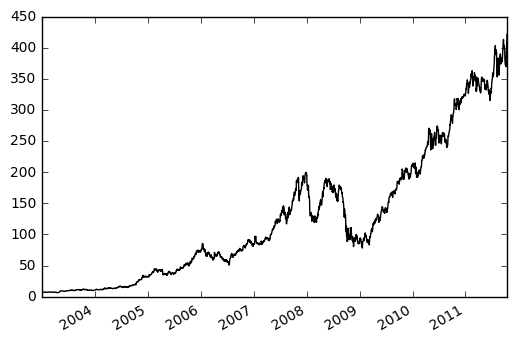

In [194]:
# AAPL股票价格走势
close_px['AAPL'].plot(color='black')

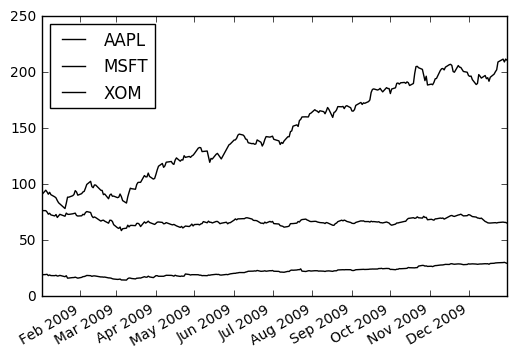

In [195]:
# 2009年股票趋势
close_px.ix['2009'].plot(color='black')

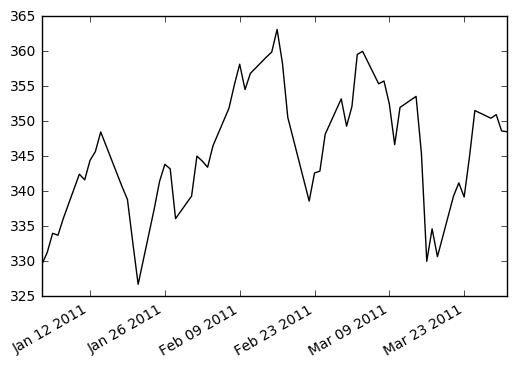

In [197]:
# AAPL在2011年1月到3月间的每日股价
close_px['AAPL'].ix['01-2011':'03-2011'].plot(color='black')

In [198]:
# 季度型频率图
aapl_q = close_px['AAPL'].resample('Q-DEC').ffill()

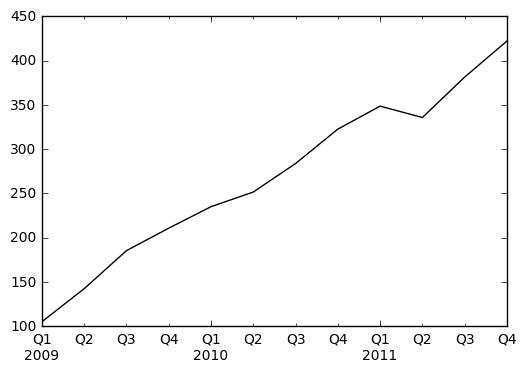

In [200]:
aapl_q.ix['2009':].plot(color='black')

# 移动窗口函数

在移动窗口上（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于时间序列的数组变换，称之为移动窗口函数（Moving window function），其中还包括那些窗口不定长的函数（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除缺失值。

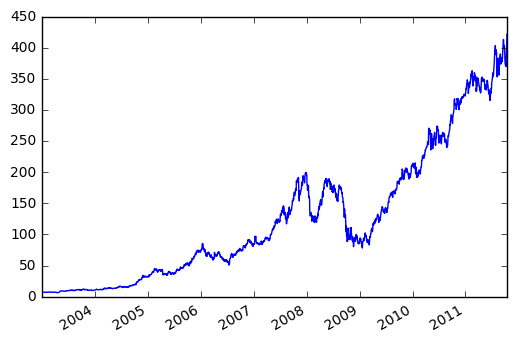

In [202]:
# rolling_mean
close_px.AAPL.plot()

d:\py3.5.2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).mean()
  """Entry point for launching an IPython kernel.


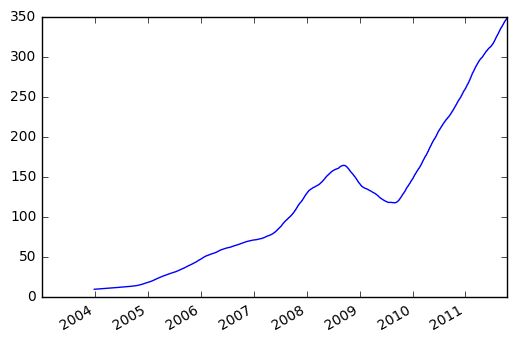

In [203]:
pd.rolling_mean(close_px.AAPL,250).plot()

In [208]:
appl_std250 = pd.rolling_std(close_px.AAPL,250,min_periods=10)
appl_std250[:10]

d:\py3.5.2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=10,center=False,window=250).std()
  """Entry point for launching an IPython kernel.


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
Name: AAPL, dtype: float64

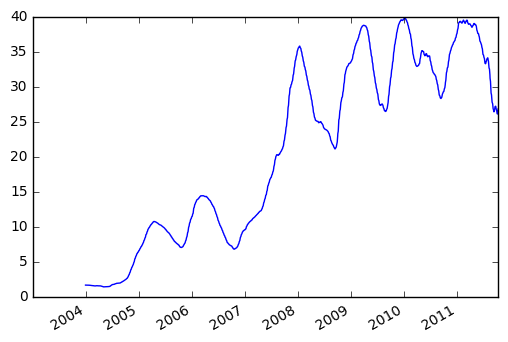

In [207]:
appl_std250.plot()

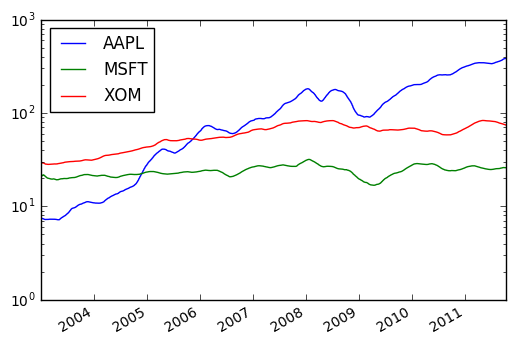

In [212]:
# 计算扩展窗口平均
#expanding_mean = lambda x:x.rolling(len(x),min_period=1).mean()
close_px.rolling(60,min_periods=1).mean().plot(logy=True)

## 指数加权函数

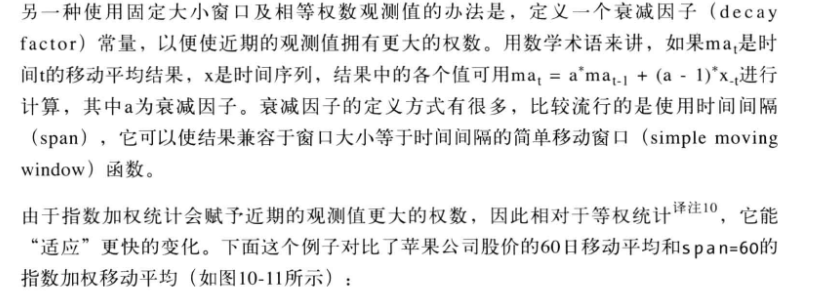

In [217]:
aapl_px=close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(60,min_periods=50).mean()

In [224]:
# ewma60 = pd.ewma(aapl_px,span=60)
ewma60 = aapl_px.ewm(span=60).mean()

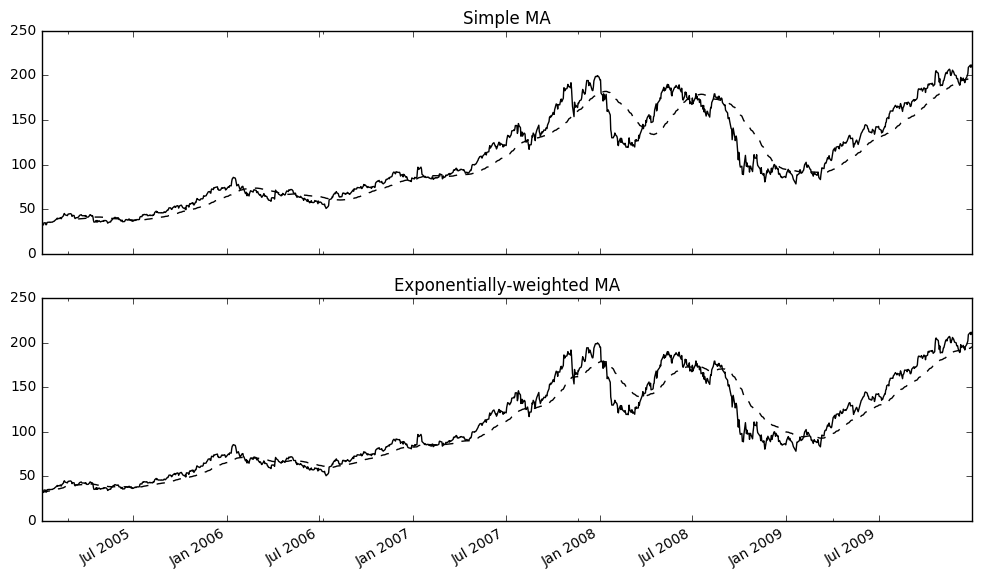

In [225]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(12,7))
aapl_px.plot(style='k-',ax=axes[0])
ma60.plot(style='k--',ax=axes[0])
aapl_px.plot(style='k-',ax=axes[1])
ewma60.plot(style='k--',ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')


## 二元移动窗口函数
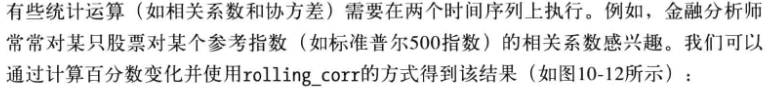

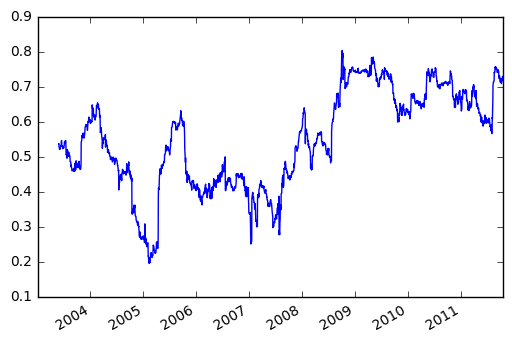

In [227]:
spx_px = close_px_all['SPX']
spx_rets = spx_px/spx_px.shift(1) - 1
returns = close_px.pct_change()   #默认periods=1，计算两个相邻样本的变化率
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

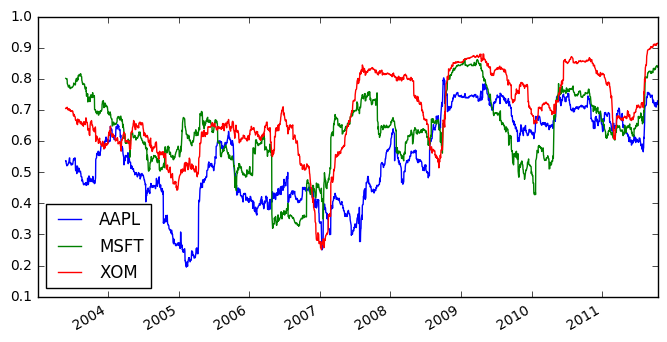

In [232]:
# 一次计算多个股票
corr = returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot(figsize=(8,4))

## 用户定义的移动窗口函数 

rolling_apply函数可以在移动窗口上应用自己设计的数组函数。唯一的要求是：该函数能从数组的各个片段中产生单个值。比如我们用rolling_quantile计算样本分位数时，可能对样本中特定值的百分等级感兴趣。scipy.stats.percentileofscore函数就能达到这个目的

In [237]:
returns.head(5)

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145


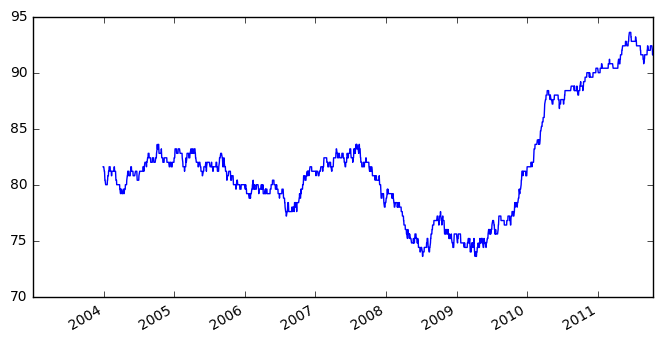

In [236]:
# AAPL 2%回报率的百分等级（一年窗口期）
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x,0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot(figsize=(8,4))